In [1]:
from dfply import *
from plotnine import *
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

I will import the data and start the cleaning process. For a big part of the cleaning process I wil use pandas library.

In [2]:
houses_areas = pd.read_csv("../raw_data/tpa_housing_exercise.csv")
houses_areas.shape

(20640, 10)

The data frame has 20640 rows and 10 columns, the columns names looks right

In [3]:
houses_areas.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
houses_areas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


The longitude and latitude are only numeric values. 

In [5]:
houses_areas["longitude"] = pd.to_numeric(houses_areas["longitude"])

In [6]:
houses_areas["longitude"].isnull().sum()

0

The longitude is logical between -180 to 180 so any value outside this isn't valid. -1.000000e+18 isn't a valid longitud so we will drop it. 

In [7]:
houses_areas >> mask(X.longitude < -180)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14441,-1.000000e+18,32.81,32,2402,551,1020,532,3.3942,307400,NEAR OCEAN


In [8]:
houses_areas >> mask(X.longitude > 180)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [9]:
houses_areas = houses_areas >> mask(between(X.longitude, -180, 180))

In [10]:
houses_areas >> mask(X.latitude == "38.52???")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52???,29,3873,797,2237,706,2.1736,72100,INLAND


The value of 38.52 in latitude is a real value and it is a place around to Sacramento California in USA, and it is actually in, so we will change this value to 38.52 withouth ???

In [11]:
houses_areas["latitude"].replace({'38.52???': "38.52"}, inplace = True)

In [12]:
houses_areas["latitude"] = pd.to_numeric(houses_areas["latitude"])

In [13]:
houses_areas["latitude"].isnull().sum()

0

The latitude only make sense when is between -90 to 90 so any value outside this will be considering an error

In [14]:
houses_areas = houses_areas >> mask(between(X.latitude, -90, 90))

In [15]:
houses_areas["housing_median_age"].sort_values(ascending = False).tail(20)

10410      2
59         2
18725      2
12868      2
16383      2
16566      2
19046      2
10336      2
19650      2
9109       2
13041      2
13713      2
9378       2
13374      2
12143      2
12286      1
3130       1
18972      1
19536      1
17246   -200
Name: housing_median_age, dtype: int64

In [16]:
houses_areas["housing_median_age"].isnull().sum()

0

It isn't logical a house with a median age of -200, in that area according to google maps some houses are very new. In this case we don't have enough evidence for calculate the average age so we will drop this line. And after we will convert this column to number, because it is age.

In [17]:
houses_areas >> mask(X.housing_median_age == -200)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17246,-119.67,34.42,-200,1333,393,1369,381,2.5947,232600,<1H OCEAN


In [18]:
houses_areas = houses_areas >> mask(X.housing_median_age > 0)

In [19]:
houses_areas["housing_median_age"] = pd.to_numeric(houses_areas["housing_median_age"])

total_rooms should be a integer value and higher or equal to total_beedrooms 

In [20]:
houses_areas["total_rooms"] = pd.to_numeric(houses_areas["total_rooms"])

In [21]:
houses_areas["total_rooms"].isnull().sum()

0

Here we will change the NaN values for 0 so we can make comparations with total_rooms and population and identify usefull patrons for filling the missing values. Also we will remove the not numerical values 

In [22]:
houses_areas["total_bedrooms"].fillna(0, inplace= True)

In [23]:
houses_areas = houses_areas >> mask(X.total_bedrooms != "a")

In [24]:
houses_areas["total_bedrooms"] = pd.to_numeric(houses_areas["total_bedrooms"])

In [25]:
houses_areas >> mutate(rooms_bedrooms = X.total_rooms < X.total_bedrooms) >> mask (X.rooms_bedrooms == True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_bedrooms


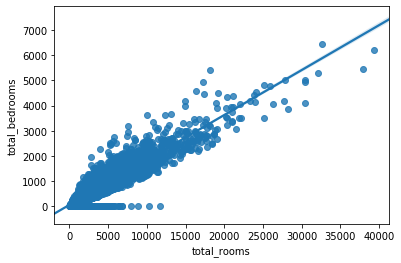

In [26]:
sns.regplot(x = "total_rooms", y = "total_bedrooms", data=houses_areas)

Here we can see that when the number of rooms increase the number of bedrooms increase, but the number of bedrooms is always lower or equal to the number of rooms 

In [27]:
houses_areas >> mask(X.population == "1823???")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
69,-122.29,37.81,46,2801,644,1823???,611,0.9802,129200,NEAR BAY


Here was probably a mistake when they type the population because a population of 1823 whit 644 bedrooms is quite normal. So we will remove the ???

In [28]:
houses_areas["population"].replace({'1823???': "1823"}, inplace = True)

In [29]:
houses_areas["population"] = pd.to_numeric(houses_areas["population"])

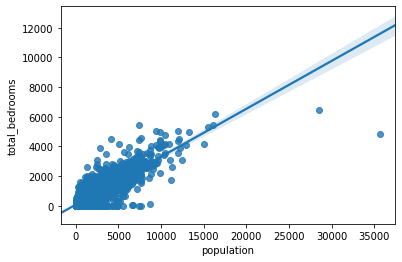

In [30]:
sns.regplot(x = "population", y = "total_bedrooms", data=houses_areas)

Here we can see that the number of bedrooms increase as the population increase more or less it is around 2 or 4 persons per beedroom, and this in some areas of California isn't that crazy. 

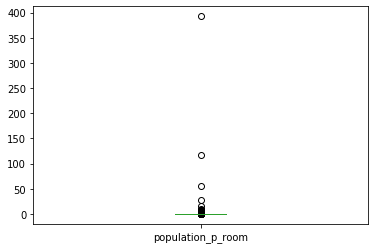

In [31]:
(houses_areas >> mask(X.total_bedrooms != 0) >> mutate(population_p_room = X.population / X.total_rooms)).plot(y = "population_p_room", kind = 'box')



We have decide that the best way to identify and work with the outliers is when we can compare the columns and decide where is a real outlier. 
Here we can see some outliers in the propotion of population per room. Let's try to identify the real outliers.

In [32]:
houses_areas_no_0 = houses_areas >> mask(X.total_bedrooms != 0) 
(houses_areas_no_0 >> mutate(population_p_room = X.population / X.total_rooms)>>select(X.population_p_room)).apply(zscore)>>arrange(X.population_p_room)>>mask(X.population_p_room > 3)

,population_p_room
16420,3.078795
9172,5.365960
13034,9.345962
16669,18.812406
3364,39.865293
19006,134.731190


In [33]:
houses_areas_no_0 >> mutate(population_p_room = X.population / X.total_rooms)>>summarize_each([np.mean, np.median, np.std], X.population_p_room)

,population_p_room_mean,population_p_room_median,population_p_room_std
0,0.619622,0.515883,2.909586


Normally a Zscore over 3 is outlier, and here we will drop this outliers because we don't want then in our model.

In [34]:
houses_areas_no_0["zscore_p_r"]=(houses_areas_no_0 >> mutate(population_p_room = X.population / X.total_rooms)>>select(X.population_p_room)).apply(zscore)
houses_areas_no_0 = houses_areas_no_0 >> mask(X.zscore_p_r <=3)

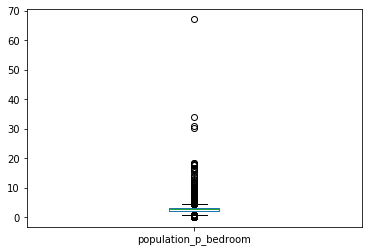

In [35]:
(houses_areas_no_0>>mutate(population_p_bedroom = X.population / X.total_bedrooms)).plot(y = "population_p_bedroom", kind = 'box')


Here we can see that the population per bedroom have some outilers, even 70 persons living in a bedroom. Let's check the mean, median, sd and zscore to identify the real outliers.

In [36]:
houses_areas_no_0>> mutate(population_p_bedroom = X.population / X.total_bedrooms) >> summarise_each([np.median, np.mean, np.std], X.population_p_bedroom)


,population_p_bedroom_median,population_p_bedroom_mean,population_p_bedroom_std
0,2.686681,2.778925,1.078999


In [37]:
houses_areas_no_0["zscore"] =(houses_areas_no_0 >> mutate(population_p_bedroom = X.population / X.total_bedrooms) >> select(X.population_p_bedroom)).apply(zscore)
houses_areas_no_0 >> mask(X.zscore > 3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zscore_p_r,zscore
91,-122.28,37.80,52,215,87,904,88,0.8668,137500,NEAR BAY,1.232144,7.054574
92,-122.28,37.80,52,96,31,191,34,0.7500,162500,NEAR BAY,0.470844,3.134725
270,-122.18,37.78,33,142,31,575,47,3.8750,225000,NEAR BAY,1.178750,14.614898
460,-122.26,37.87,52,1087,371,3337,350,1.4012,175000,NEAR BAY,0.842146,5.760601
1039,-120.97,38.42,16,1748,322,4930,287,4.3029,121900,INLAND,0.756377,11.614128
...,...,...,...,...,...,...,...,...,...,...,...,...
20248,-119.23,34.25,28,26,3,29,9,8.0000,275000,NEAR OCEAN,0.170389,6.383454
20318,-119.15,34.20,25,3445,898,5558,894,3.0972,169300,NEAR OCEAN,0.341537,3.160692
20324,-119.12,34.25,31,737,146,1436,168,3.5625,194100,NEAR OCEAN,0.456703,6.540034
20352,-119.09,34.22,8,40,10,309,16,4.0208,52500,NEAR OCEAN,2.442058,26.062185


We will drop the values when the zscore of population per bedroom is over 3, they could be real outliers and If we check the law in that area of USA, the max amount of people that can legaly live in a rent room are 2, here the mean is close to 3 and the population per bedroom over 3 zscore is above 6 persons per bedroom so 2 means. We consider that we have enough evidence for suporting the drop of this 101 rows. 

In [38]:
houses_areas_no_0 = houses_areas_no_0 >> mask(X.zscore <= 3)

In [39]:
houses_areas_no_0 = houses_areas_no_0 >> drop(X.zscore_p_r, X.zscore)

In [40]:
houses_areas_w_0 = houses_areas >> mask(X.total_bedrooms == 0) >> mutate(population_p_room = X.population/X.total_rooms) >> mutate(total_bedrooms = X.population * X.population_p_room)
houses_areas_w_0 = houses_areas_w_0.round({"total_bedrooms" : 0})>>drop(X.population_p_room)


In [41]:
houses_areas = houses_areas_no_0 >> bind_rows(houses_areas_w_0, join = "inner")
houses_areas >> arrange(X.total_bedrooms)>>tail(50)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12137,-117.19,33.90,3,21060,3366.0,9623,2812,4.189000e+00,143000,INLAND
13098,-121.40,38.47,4,20982,3392.0,10329,3086,4.365800e+00,130600,INLAND
12814,-121.50,38.62,8,16679,3457.0,7919,3329,3.718800e+00,134500,INLAND
12227,-116.99,33.73,13,16148,3474.0,6159,3232,1.996100e+00,97800,INLAND
12375,-116.38,33.74,7,17579,3479.0,3581,1820,4.084000e+00,194500,INLAND
1010,-121.73,37.68,17,20354,3493.0,8768,3293,5.449600e+00,238900,INLAND
12868,-121.35,38.72,2,21897,3513.0,8652,2873,4.543200e+00,151300,INLAND
20451,-118.90,34.26,5,25187,3521.0,11956,3478,6.971200e+00,321300,<1H OCEAN
13176,-117.75,34.01,4,22128,3522.0,10450,3258,6.128700e+00,289600,<1H OCEAN
11775,-121.33,38.77,3,20214,3559.0,8361,3112,4.225900e+00,169300,INLAND


In [42]:
houses_areas["households"].isnull().sum()

0

In [43]:
houses_areas >> mask(X.households == "422??")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
114,-122.25,37.83,35,1613,428.0,675,422??,3.4722,243100,NEAR BAY


This value doesn't look very crazy, the amount of households are close to the total of beedrooms but the total of rooms is quite high, so we belive this is a real value so we will keep it

In [44]:
houses_areas["households"].replace({'422??': "422"}, inplace = True)

In [45]:
houses_areas["households"] = pd.to_numeric(houses_areas["households"])

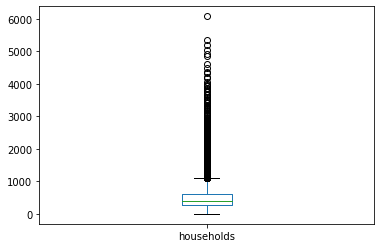

In [46]:
houses_areas["households"].plot(kind = "box")

In [47]:
houses_areas >> mutate(households_rooms = X.households/X.total_rooms) >> arrange(X.households_rooms)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,households_rooms
1914,-120.10,38.91,33,1561,282.0,30,11,1.8750,500001,INLAND,0.007047
1979,-120.08,38.80,34,1988,511.0,36,15,4.6250,162500,INLAND,0.007545
12447,-114.49,33.97,17,2809,635.0,83,45,1.6154,87500,INLAND,0.016020
1913,-120.06,39.01,19,2967,528.0,112,48,4.0714,437500,INLAND,0.016178
11862,-121.25,40.27,25,958,245.0,28,16,2.6250,67500,INLAND,0.016701
...,...,...,...,...,...,...,...,...,...,...,...
14818,-117.11,32.68,36,26,14.0,58,23,1.9107,125000,NEAR OCEAN,0.884615
17820,-121.90,37.37,20,78,72.0,120,69,1.0938,187500,<1H OCEAN,0.884615
3126,-117.79,35.21,4,2,2.0,6,2,2.3750,137500,INLAND,1.000000
8219,-118.21,33.79,33,32,18.0,96,36,4.5938,112500,NEAR OCEAN,1.125000


It isn't logical that we have more households than rooms so I will remove this rows

In [48]:
houses_areas = houses_areas >> mutate(households_rooms = X.households/X.total_rooms) >> mask(X.households_rooms <= 1) >>drop(X.households_rooms)

In [49]:
houses_areas >> mutate(boolean = X.total_rooms < X.total_bedrooms)>> mask(X.boolean == True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,boolean
2028,-119.75,36.71,38,1481,1608.0,1543,372,1.4577,49800,INLAND,True
3958,-118.59,34.20,21,1789,2957.0,2300,677,2.7540,179800,<1H OCEAN,True
4279,-118.31,34.09,37,773,902.0,835,312,1.8576,193800,<1H OCEAN,True
4391,-118.27,34.07,27,1190,2708.0,1795,422,1.7016,160000,<1H OCEAN,True
4447,-118.21,34.07,52,1770,1929.0,1848,439,2.4135,167200,<1H OCEAN,True
4591,-118.28,34.06,42,2472,5826.0,3795,1179,1.2254,162500,<1H OCEAN,True
4600,-118.27,34.04,13,1784,2610.0,2158,682,1.7038,118100,<1H OCEAN,True
4667,-118.29,34.05,34,1102,1593.0,1325,439,1.5972,168800,<1H OCEAN,True
5236,-118.23,33.94,36,1110,1809.0,1417,302,2.3333,92100,<1H OCEAN,True
7191,-118.18,34.04,42,1670,2388.0,1997,452,2.7880,150500,<1H OCEAN,True


We cannot have total rooms lower than total bedrooms so we will drop them 

In [50]:
houses_areas = houses_areas >> mutate(boolean = X.total_rooms < X.total_bedrooms)>> mask(X.boolean == False) >>drop(X.boolean)

In [51]:
houses_areas >> mutate(households_population= X.households/X.population) >> arrange(X.households_population)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,households_population
2511,-119.54,36.51,36,49,7.0,28,2,4.6250,162500,INLAND,0.071429
17891,-121.93,37.40,34,148,28.0,132,13,3.3750,67500,<1H OCEAN,0.098485
3317,-122.71,38.91,20,41,18.0,94,10,1.3750,55000,INLAND,0.106383
13982,-117.28,35.13,32,671,166.0,856,114,2.6477,53300,INLAND,0.133178
17193,-119.78,34.45,9,1830,353.0,1515,220,4.2109,450000,NEAR OCEAN,0.145215
...,...,...,...,...,...,...,...,...,...,...,...
4623,-118.31,34.06,36,369,147.0,145,136,0.8804,450000,<1H OCEAN,0.937931
19427,-121.00,37.71,52,102,23.0,35,33,2.2500,175000,INLAND,0.942857
19522,-121.00,37.65,17,484,202.0,198,204,0.6825,187500,INLAND,1.030303
5342,-118.44,34.04,16,18,6.0,3,4,0.5360,350000,<1H OCEAN,1.333333


Have some areas with more households than people could be explain because some of those place have holiday houses and in that sense the households aren't part of the population. 

In [52]:
houses_areas["median_income"] = pd.to_numeric(houses_areas["median_income"])

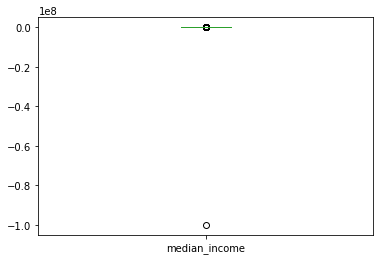

In [53]:
houses_areas["median_income"].plot(kind = "box")

A negative median income is a mistake so we will drop it

In [54]:
houses_areas = houses_areas >> mask(X.median_income > 0)

We can see that they are some areas with a very high median income but the best way to identify if they are real outliers is in comparassion with the value of the house.

In [55]:
houses_areas["median_house_value"].isnull().sum()

0

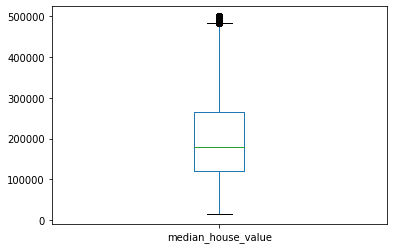

In [56]:
houses_areas["median_house_value"] = pd.to_numeric(houses_areas["median_house_value"])

houses_areas["median_house_value"].plot(kind = "box")

Here we can see that are some areas where the median value of the house is very high, let's compare this with the median income

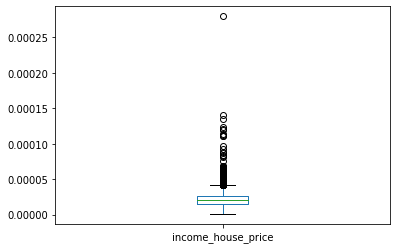

In [57]:
(houses_areas >> mutate(income_house_price = X.median_income / X.median_house_value) >> select(X.income_house_price)).plot(y = "income_house_price", kind = "box")

It is clear some outliers in the proportion between median income and median price of the house. Let's check the stadistics and the zscore

In [58]:
houses_areas >> mutate(income_house_price = X.median_income / X.median_house_value) >> summarize_each([np.mean, np.median, np.std], X.income_house_price)

,income_house_price_mean,income_house_price_median,income_house_price_std
0,0.000021,0.00002,0.000009


In [59]:
(houses_areas >> mutate(income_house_price = X.median_income / X.median_house_value)>> select(X.income_house_price)).apply(zscore)>>arrange(X.income_house_price)>>mask(X.income_house_price > 3)

,income_house_price
2392,3.003085
16185,3.010295
2745,3.013339
3209,3.017312
2748,3.034816
...,...
13889,10.833843
2763,11.172628
5887,12.430476
2799,12.951091


To be honest in USA is quite realistic that some people earn really a little amount of money and they have a great house, but because we want to use the data with model purpose, it is better drop this style of extreme cases. And actually they are only 137 rows

In [60]:
houses_areas["zscore"] = (houses_areas >> mutate(income_house_price = X.median_income / X.median_house_value)>> select(X.income_house_price)).apply(zscore)

In [61]:
houses_areas = houses_areas >> mask(X.zscore <= 3) >> drop(X.zscore)

In [62]:
houses_areas.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', '<1H OCEAN??',
       'ISLAND'], dtype=object)

In [63]:
houses_areas >> mask(X.ocean_proximity == "<1H OCEAN??")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7611,-118.22,33.88,35,998,313.0,1335,311,1.6574,102500,<1H OCEAN??


According to google maps this point is 10.7 miles far away from the ocean, so you can be there in less than 20 minutes by car and less than 1 hour by bicycle, so we will onlye correct the mistake

In [64]:
houses_areas["ocean_proximity"].replace({'<1H OCEAN??': "<1H OCEAN"}, inplace = True)

In [65]:
houses_areas.to_csv("../clean_data/houses_areas.csv", index = False)